In [36]:
%run utils.ipynb

import warnings
warnings.simplefilter('ignore')
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

In [37]:
df_train = pd.read_csv("electricity_demand/train.csv")
df_test = pd.read_csv("electricity_demand/test.csv")

In [38]:
df_train.head()

,Unnamed: 0,datetime,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_mass,cloud_cover,air_density,demand
0,0,2014-01-01 00:00:00,0.0024,-1.693,0.0000,0.0000,0.0013,5.0829,0.5736,1.1372,21809.63
1,1,2014-01-01 01:00:00,0.0011,-1.912,0.0000,0.0000,0.0003,5.0840,0.5857,1.1381,20711.50
2,2,2014-01-01 02:00:00,0.0014,-2.088,0.0000,0.0000,0.0002,5.0846,0.5982,1.1390,19460.02
3,3,2014-01-01 03:00:00,0.0016,-2.245,0.0000,0.0000,0.0003,5.0854,0.5891,1.1400,18654.16
4,4,2014-01-01 04:00:00,0.0016,-2.393,2.2857,6.9264,0.0005,5.0862,0.5619,1.1410,18090.40


In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          35064 non-null  int64  
 1   datetime            35064 non-null  object 
 2   precipitation       35064 non-null  float64
 3   temperature         35064 non-null  float64
 4   irradiance_surface  35064 non-null  float64
 5   irradiance_toa      35064 non-null  float64
 6   snowfall            35064 non-null  float64
 7   snow_mass           35064 non-null  float64
 8   cloud_cover         35064 non-null  float64
 9   air_density         35064 non-null  float64
 10  demand              35064 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 2.9+ MB


In [40]:
df_test.head()

,Unnamed: 0,datetime,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_mass,cloud_cover,air_density,demand
0,0,2018-01-01 00:00:00,0.1105,0.467,0.0000,0.0000,0.0635,2.5663,0.5049,1.1236,NaN
1,1,2018-01-01 01:00:00,0.1155,0.308,0.0000,0.0000,0.0677,2.6358,0.4915,1.1236,NaN
2,2,2018-01-01 02:00:00,0.1219,0.171,0.0000,0.0000,0.0732,2.7103,0.4781,1.1236,NaN
3,3,2018-01-01 03:00:00,0.1251,0.009,0.0000,0.0000,0.0835,2.7920,0.4731,1.1243,NaN
4,4,2018-01-01 04:00:00,0.1234,-0.121,1.6207,6.9225,0.0873,2.8800,0.4703,1.1253,NaN


In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2160 non-null   int64  
 1   datetime            2160 non-null   object 
 2   precipitation       2160 non-null   float64
 3   temperature         2160 non-null   float64
 4   irradiance_surface  2160 non-null   float64
 5   irradiance_toa      2160 non-null   float64
 6   snowfall            2160 non-null   float64
 7   snow_mass           2160 non-null   float64
 8   cloud_cover         2160 non-null   float64
 9   air_density         2160 non-null   float64
 10  demand              0 non-null      float64
dtypes: float64(9), int64(1), object(1)
memory usage: 185.8+ KB


In [42]:
df_train = describe_dataset("Train", df_train.drop('Unnamed: 0', axis=1))
df_test = describe_dataset("Test", df_test.drop('Unnamed: 0', axis=1))

Checked Train


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
precipitation,35064.000000,0.062595,0.095559,0.000000,0.000000,0.000000,0.003000,0.023400,0.081400,0.258300,0.456074,1.032700
temperature,35064.000000,11.692304,9.827874,-12.856000,-7.757850,-2.943850,3.906750,11.184000,18.919250,29.263550,32.484370,35.953000
irradiance_surface,35064.000000,215.277139,288.869804,0.000000,0.000000,0.000000,0.000000,18.259600,406.371475,831.540415,953.772385,1024.527500
irradiance_toa,35064.000000,332.155688,411.576187,0.000000,0.000000,0.000000,0.000000,49.460300,661.470600,1145.964520,1239.373955,1262.921200
snowfall,35064.000000,0.011446,0.035165,0.000000,0.000000,0.000000,0.000000,0.000000,0.002500,0.073800,0.182422,0.449200
snow_mass,35064.000000,3.099655,6.858638,0.000000,0.000000,0.000000,0.000000,0.006300,2.323600,21.869670,29.923229,35.391200
cloud_cover,35064.000000,0.360703,0.248690,0.000000,0.004100,0.024500,0.131300,0.340200,0.557000,0.792440,0.906737,0.986000
air_density,35064.000000,1.085585,0.036332,1.002400,1.017400,1.027200,1.056100,1.085900,1.113500,1.143600,1.165137,1.193800
demand,35064.000000,28701.441670,4771.439840,0.000000,19473.659000,21482.094500,25009.997500,28697.645000,31883.527500,36974.553500,40228.873900,45455.650000





Checked Test


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
precipitation,2160.000000,0.092689,0.120113,0.000000,0.000000,0.000200,0.011875,0.054950,0.122475,0.319835,0.546631,0.968600
temperature,2160.000000,4.284432,4.508352,-6.377000,-4.718470,-2.648150,1.175500,3.813000,7.177250,12.448700,15.617230,17.222000
irradiance_surface,2160.000000,136.412156,197.861598,0.000000,0.000000,0.000000,0.000000,0.514550,265.883050,539.579545,707.046656,880.199700
irradiance_toa,2160.000000,250.932026,335.923239,0.000000,0.000000,0.000000,0.000000,2.345500,539.692150,921.291425,1049.553549,1107.532600
snowfall,2160.000000,0.022276,0.042281,0.000000,0.000000,0.000000,0.000200,0.003700,0.025300,0.101000,0.197028,0.482600
snow_mass,2160.000000,4.366052,3.992238,0.001800,0.007200,0.035665,1.169750,3.579650,5.914175,13.186855,15.680705,16.013300
cloud_cover,2160.000000,0.579335,0.206206,0.073600,0.104062,0.182740,0.454575,0.605350,0.727600,0.887730,0.950064,0.981700
air_density,2160.000000,1.110821,0.018361,1.058900,1.070518,1.080790,1.098100,1.110700,1.122425,1.142900,1.154523,1.161600
demand,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [43]:
class CFG:
    log_operation = False

    LOF = False
    IForest = False

    min_max_scaler = True
    standard_scaler = False
    robust_scaler = False

    histgbr_optuna = False
    lgb_optuna = False
    xgb_optuna = False
    catb_optuna = False

    histgradient = False
    lightgbm = False
    xgboost = False
    catboost = False

    lstm_tuner = False
    gru_tuner = False
    lstm_gru_tuner = False

    lstm_model = False
    gru_model = False
    lstm_gru_model = True

In [44]:
data_process = LogOperation(CFG())
train = data_process.process(df_train, ['datetime'])
test = data_process.process(df_test, ['datetime'])

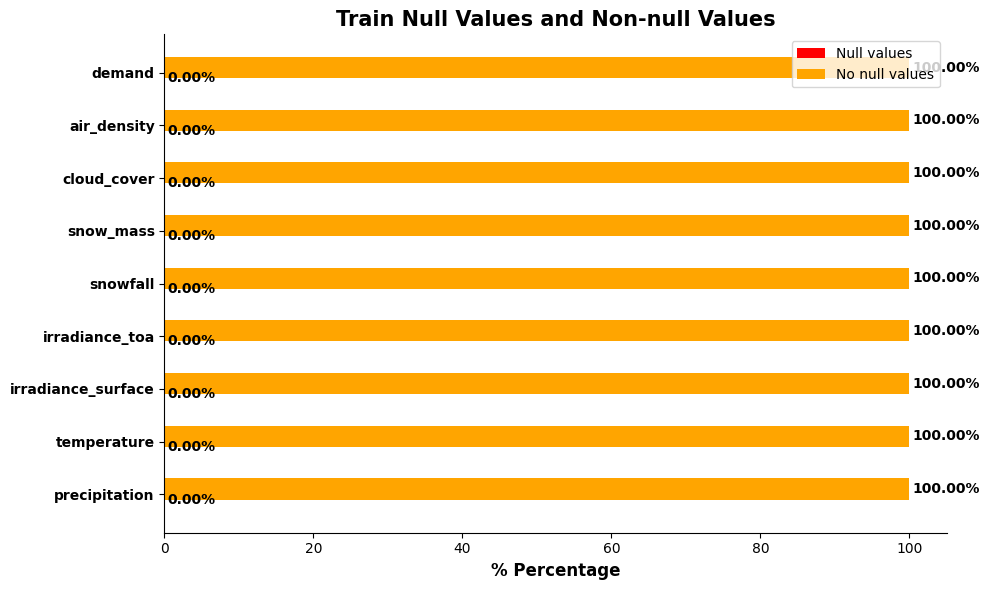

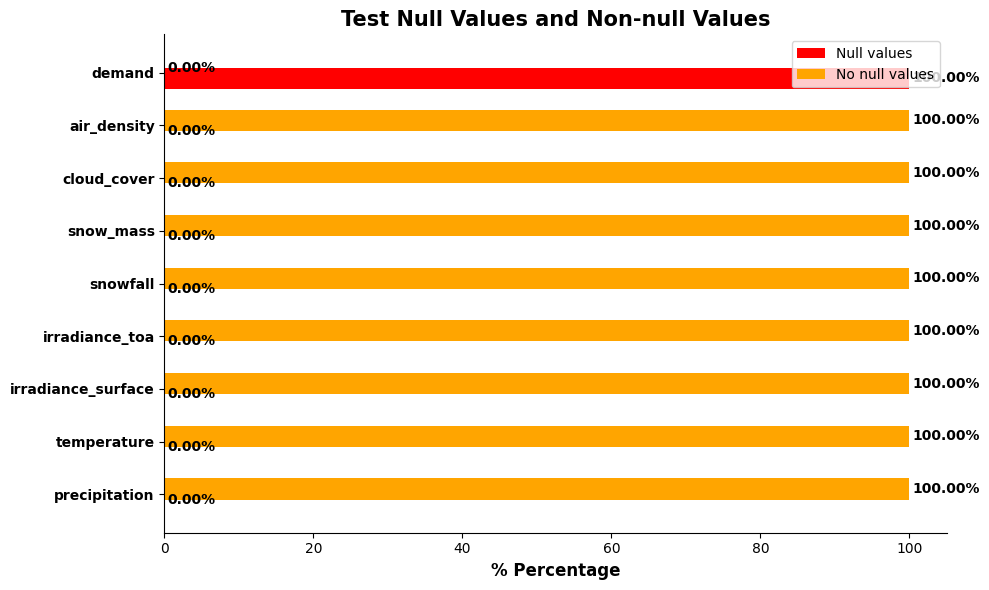

In [45]:
check_missing_values('Train', train)
check_missing_values('Test', test)

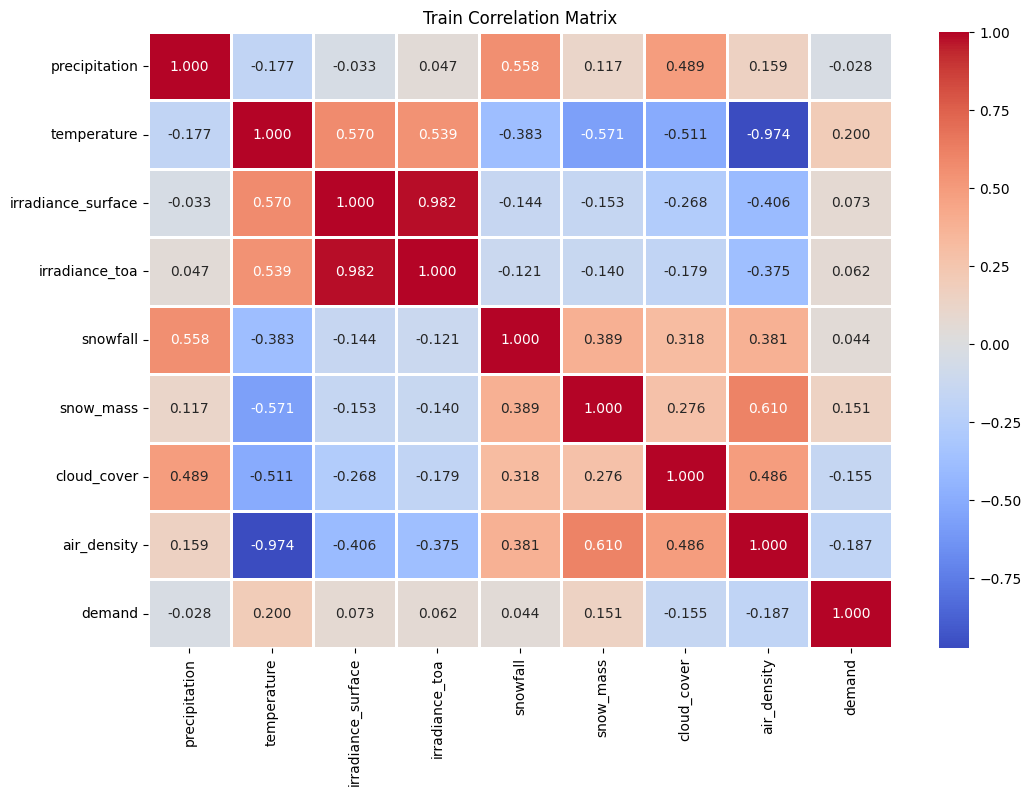

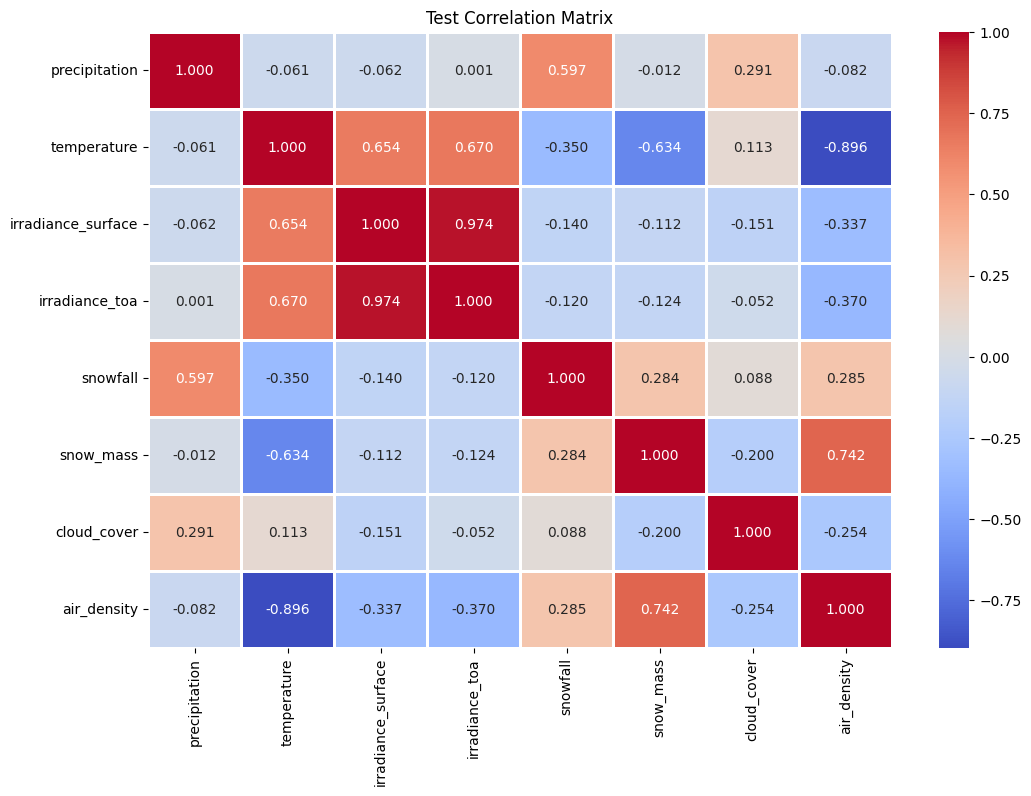

In [46]:
correlation_matrix('Train', train)
correlation_matrix('Test', test.drop(['demand'], axis=1))

In [47]:
train_num_cols = grab_col_names('Train', train)
test_num_cols =grab_col_names('Test', test.drop(['demand'], axis=1))

Train Dataset
******************** 

Observations 35064
Variables:  9
cat_cols:  0
num_cols:  9
cat_but_car:  0
num_but_cat:  0


Test Dataset
******************** 

Observations 2160
Variables:  8
cat_cols:  0
num_cols:  8
cat_but_car:  0
num_but_cat:  0




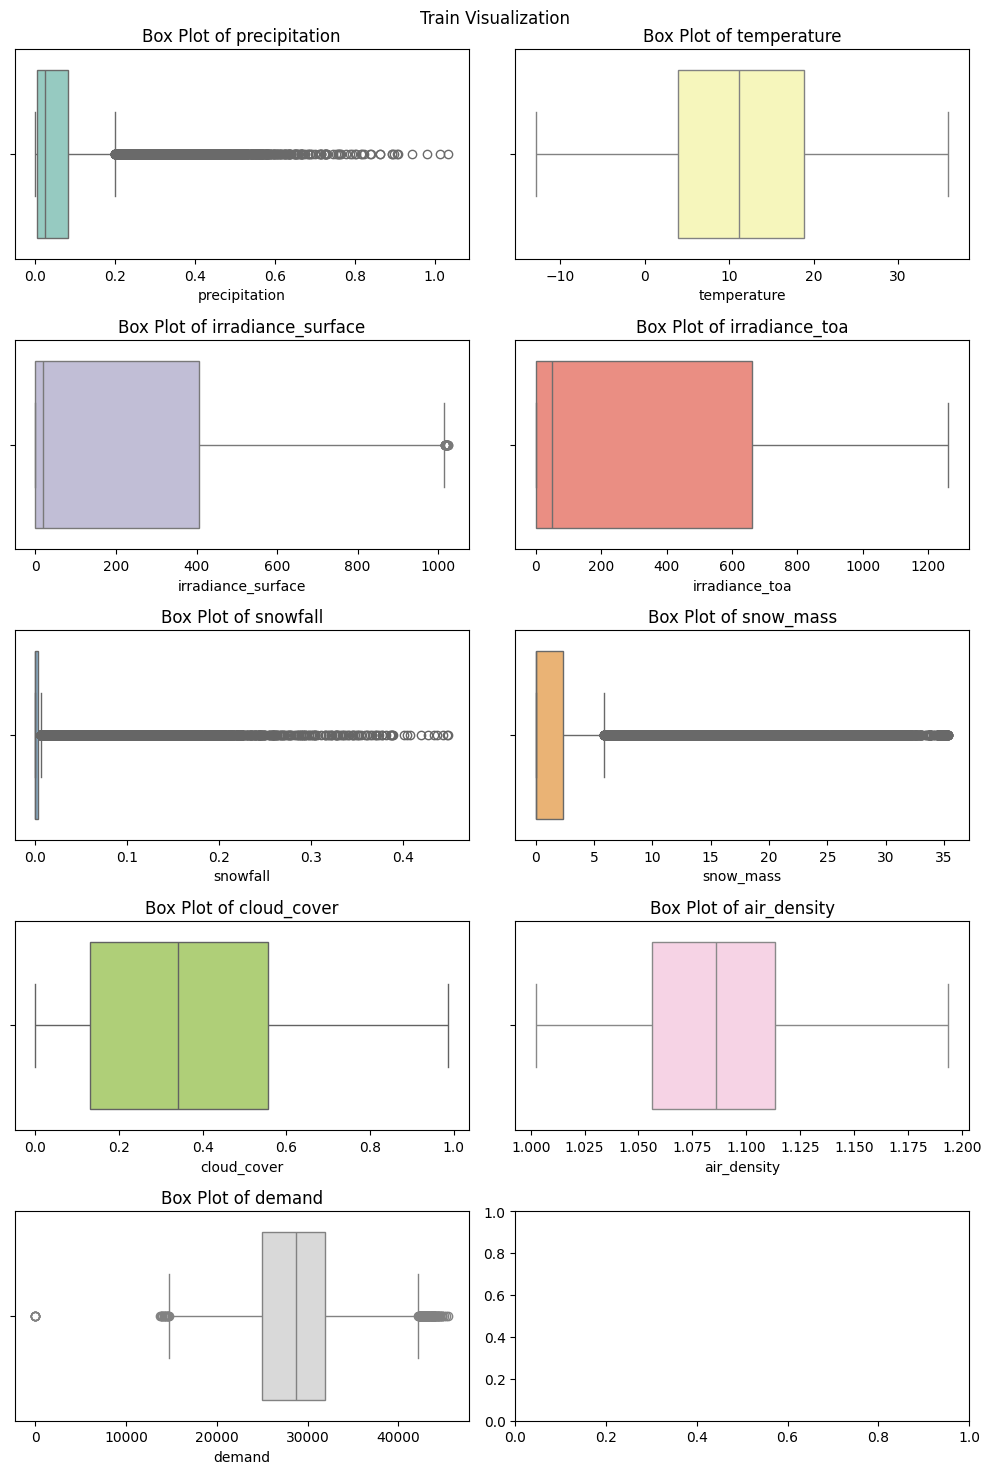

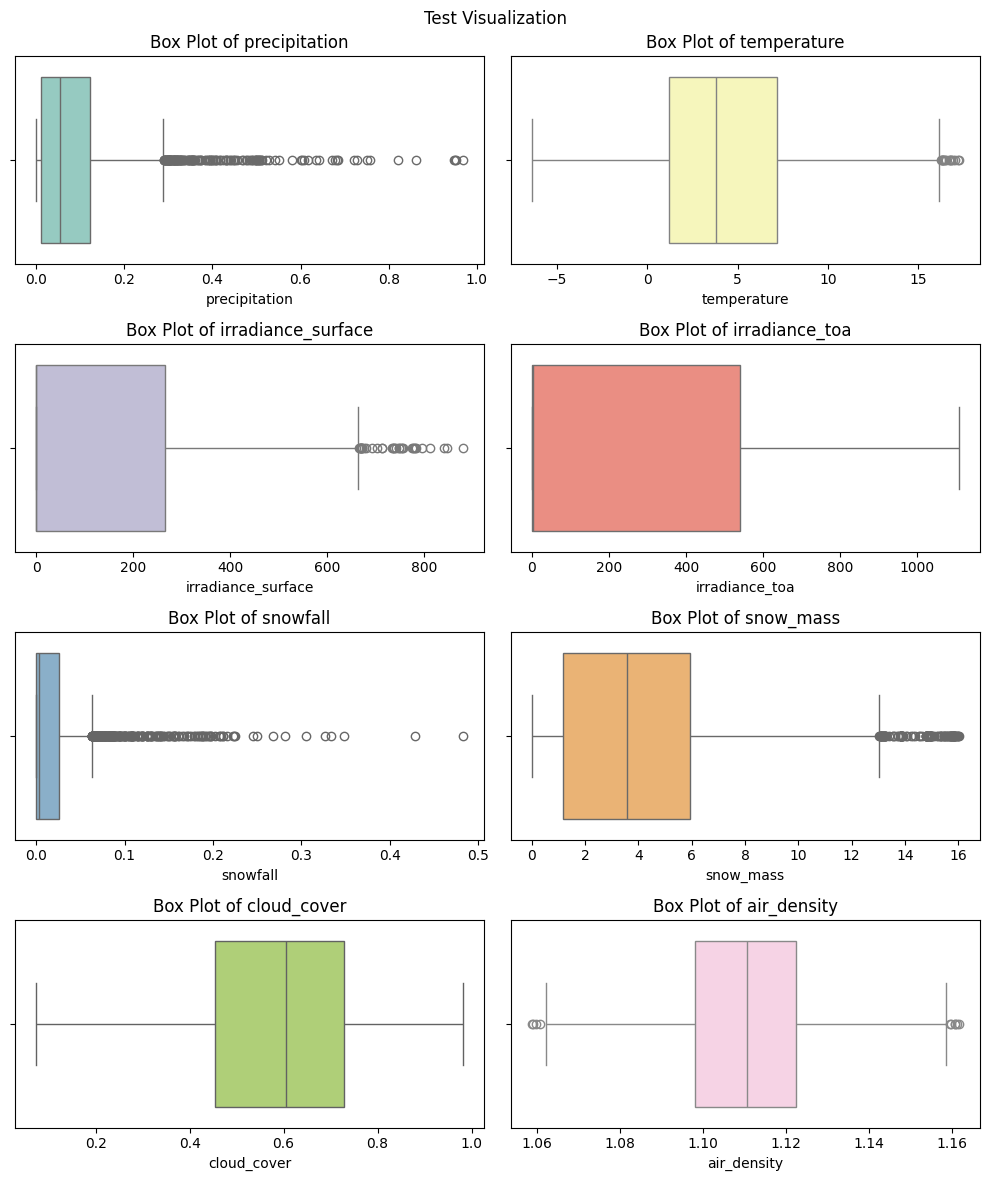

In [48]:
boxplot('Train', train, train_num_cols)
boxplot('Test', test, test_num_cols)

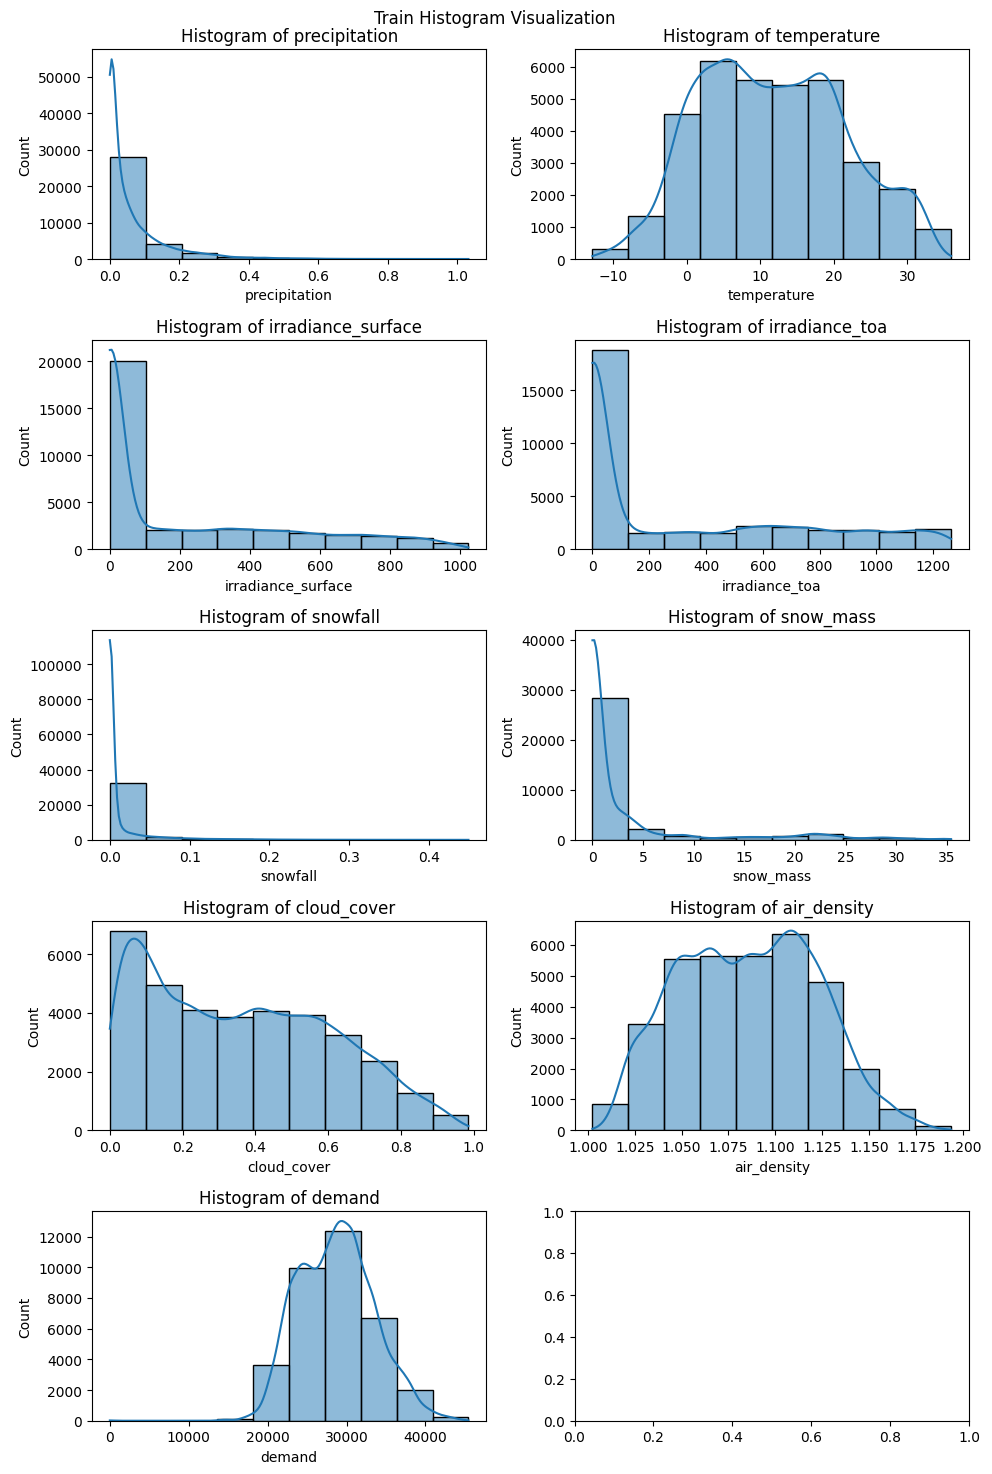

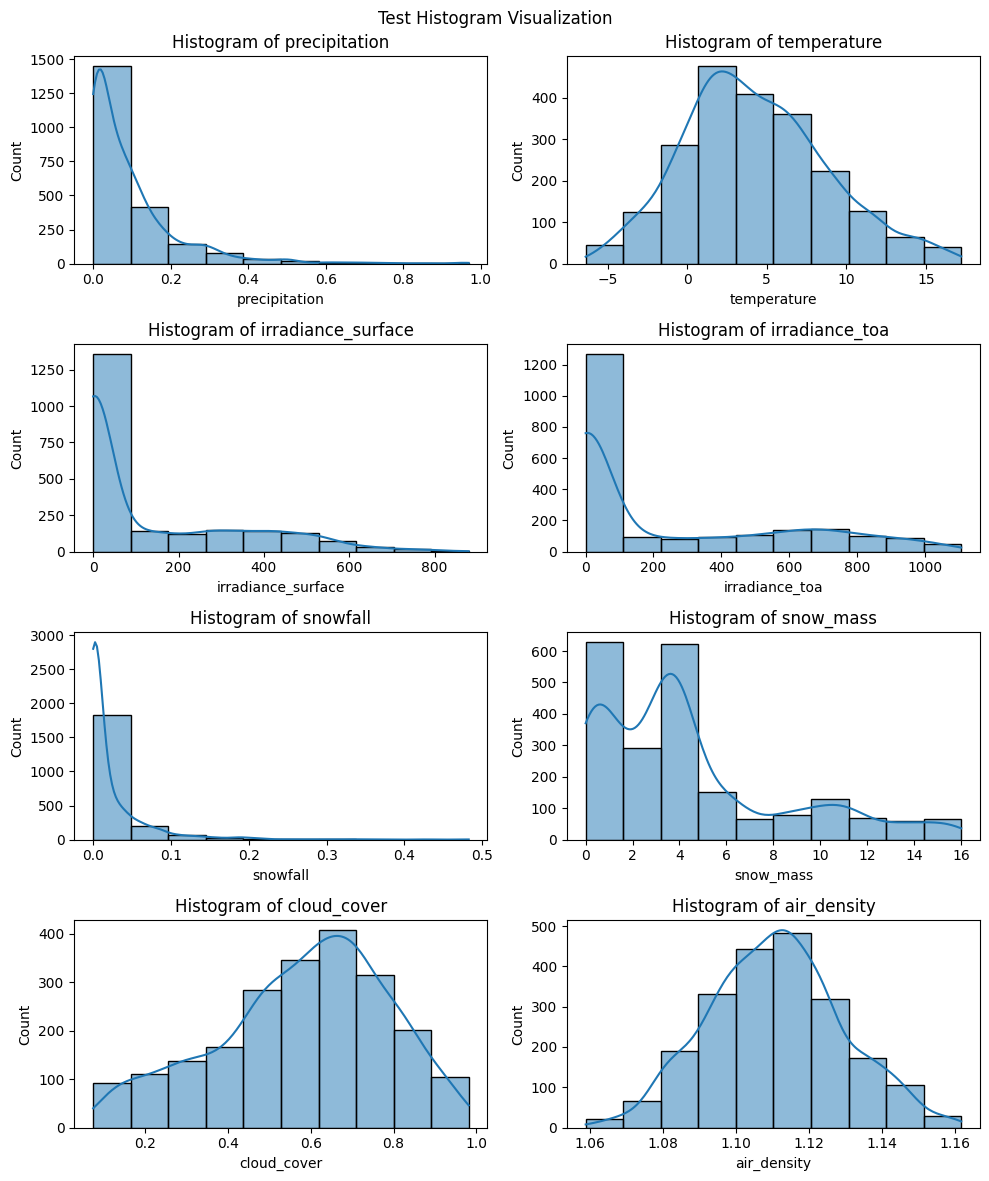

In [49]:
hist_plot('Train', train, train_num_cols)
hist_plot('Test', test, test_num_cols)

In [50]:
check_outlier("Train", df_train, train_num_cols)
check_outlier("Test", df_test, test_num_cols)


 Checking for Train Dataset
precipitation column has outliers..
temperature column has no outliers..
irradiance_surface column has no outliers..
irradiance_toa column has no outliers..
snowfall column has outliers..
snow_mass column has outliers..
cloud_cover column has no outliers..
air_density column has no outliers..
demand column has outliers..



 Checking for Test Dataset
precipitation column has outliers..
temperature column has no outliers..
irradiance_surface column has no outliers..
irradiance_toa column has no outliers..
snowfall column has outliers..
snow_mass column has no outliers..
cloud_cover column has no outliers..
air_density column has no outliers..




In [51]:
df_train = df_train.drop(['snowfall', 'snow_mass'], axis=1)
df_test = df_test.drop(['snowfall', 'snow_mass'], axis=1)

In [52]:
outlier_detect_process = OutlierDetection(CFG())
df_train = outlier_detect_process.process('Train', df_train, train_num_cols, 0.05, 20)
df_test = outlier_detect_process.process('Test', df_test, test_num_cols, 0.05, 20)

Outlier Detection process is disabled. Returning original dataframe.
Outlier Detection process is disabled. Returning original dataframe.


In [53]:
df_train = datetime_process(df_train, 'datetime')
df_test = datetime_process(df_test, 'datetime')

In [54]:
df_train.head()

,precipitation,temperature,irradiance_surface,irradiance_toa,cloud_cover,air_density,demand,year,quarter,month,week,day_of_week,day_of_year,is_weekend,hour
datetime,,,,,,,,,,,,,,,
2014-01-01 00:00:00,0.0024,-1.693,0.0000,0.0000,0.5736,1.1372,21809.63,2014,1,1,1,2,1,0,0
2014-01-01 01:00:00,0.0011,-1.912,0.0000,0.0000,0.5857,1.1381,20711.50,2014,1,1,1,2,1,0,1
2014-01-01 02:00:00,0.0014,-2.088,0.0000,0.0000,0.5982,1.1390,19460.02,2014,1,1,1,2,1,0,2
2014-01-01 03:00:00,0.0016,-2.245,0.0000,0.0000,0.5891,1.1400,18654.16,2014,1,1,1,2,1,0,3
2014-01-01 04:00:00,0.0016,-2.393,2.2857,6.9264,0.5619,1.1410,18090.40,2014,1,1,1,2,1,0,4


In [55]:
df_test.head()

,precipitation,temperature,irradiance_surface,irradiance_toa,cloud_cover,air_density,demand,year,quarter,month,week,day_of_week,day_of_year,is_weekend,hour
datetime,,,,,,,,,,,,,,,
2018-01-01 00:00:00,0.1105,0.467,0.0000,0.0000,0.5049,1.1236,NaN,2018,1,1,1,0,1,0,0
2018-01-01 01:00:00,0.1155,0.308,0.0000,0.0000,0.4915,1.1236,NaN,2018,1,1,1,0,1,0,1
2018-01-01 02:00:00,0.1219,0.171,0.0000,0.0000,0.4781,1.1236,NaN,2018,1,1,1,0,1,0,2
2018-01-01 03:00:00,0.1251,0.009,0.0000,0.0000,0.4731,1.1243,NaN,2018,1,1,1,0,1,0,3
2018-01-01 04:00:00,0.1234,-0.121,1.6207,6.9225,0.4703,1.1253,NaN,2018,1,1,1,0,1,0,4


# **Quarterly Visualization of Demand on Train**

In [56]:
target_analysis_quarterly(df_train, 'year', 'quarter', 'demand')

# **Monthly Visualization of Demand on Train**

In [57]:
target_analysis_monthly(df_train, 'year', 'month', 'demand')

# **Weekly Visualization of Demand on Train**

In [58]:
target_analysis_weekly(df_train, 'year', 'week', 'demand')

# **Hourly Visualization of Demand on Train**

In [59]:
target_analysis_hourly(df_train, 'year', 'month', 'hour', 'demand')

In [60]:
data_scaling_process = Scaler(CFG())
df_train, df_test, scaler = data_scaling_process.process(df_train, df_test, 'week')

MinMaxScaler process worked..


In [61]:
data_tuning_process = Optuna(CFG())
best_params = data_tuning_process.process(df_train, 'demand', 50)

All Optuna processes are disabled. Process passed


In [62]:
ml_model_process = MLModels(CFG())
df_train = ml_model_process.process(df_train, 'demand', best_params)

All ML models are disabled. Process passed...


In [63]:
keras_tuner_process = KerasTuner(CFG())
best_keras_tuner_hp = keras_tuner_process.process(df_train, 'demand')

KerasTuner process is disabled. Process passed..


In [64]:
dl_model_process = DLModels(CFG())
y_pred = dl_model_process.process(df_train, df_test, 'demand', 256, 0.1, 0.001, 0.001)

LSTM-GRU Model is executing..

Epoch 1/20
1096/1096 [==============================] - 25s 13ms/step - loss: 0.0482
Epoch 2/20
1096/1096 [==============================] - 13s 12ms/step - loss: 0.0112
Epoch 3/20
1096/1096 [==============================] - 14s 13ms/step - loss: 0.0111
Epoch 4/20
1096/1096 [==============================] - 14s 13ms/step - loss: 0.0111
Epoch 5/20
1096/1096 [==============================] - 15s 13ms/step - loss: 0.0111
Epoch 6/20
68/68 [==============================] - 1s 5ms/step


# **About Original Test Results**

> ### Predictions

- The electricity demand training dataset resulted in the best loss using the LSTM-GRU model after trials with Keras Tuner.

- The LSTM-GRU model processes data in a three-dimensional format, hence the predictions have been transformed from a three-dimensional form to a two-dimensional form.

- The transformed predictions have been merged with the test dataset and then reverted to their original form using the previously employed MinMaxScaler scaling method.

- Regarding predictions, the following graphs depict total demand values and average demand values on a monthly, weekly, and hourly basis.

In [65]:
y_pred = y_pred.reshape(-1, 1)
df_test['demand'] = y_pred
df_test = pd.DataFrame(scaler.inverse_transform(df_test), index=df_test.index, columns=df_test.columns)

In [66]:
df_test.head()

,precipitation,temperature,irradiance_surface,irradiance_toa,cloud_cover,air_density,demand,year,quarter,month,week,day_of_week,day_of_year,is_weekend,hour
datetime,,,,,,,,,,,,,,,
2018-01-01 00:00:00,0.1105,0.467,0.0000,0.0000,0.5049,1.1236,28464.521318,2018.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
2018-01-01 01:00:00,0.1155,0.308,0.0000,0.0000,0.4915,1.1236,28464.521318,2018.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-01-01 02:00:00,0.1219,0.171,0.0000,0.0000,0.4781,1.1236,28464.521318,2018.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0
2018-01-01 03:00:00,0.1251,0.009,0.0000,0.0000,0.4731,1.1243,28464.521318,2018.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0
2018-01-01 04:00:00,0.1234,-0.121,1.6207,6.9225,0.4703,1.1253,28464.521318,2018.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0


# **Monthly Visualization of Demand on Test**

In [67]:
target_analysis_monthly(df_test, 'year', 'month', 'demand')

# **Weekly Visualization of Demand on Test**

In [68]:
target_analysis_weekly(df_test, 'year', 'week', 'demand')

# **Hourly Visualization of Demand on Test**

In [69]:
target_analysis_hourly(df_test, 'year', 'month', 'hour', 'demand')

In [70]:
df_test.to_csv('electricy_demand_results.csv')